In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as TTS ,cross_val_score as CSV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn

    0   1
0  43   0
1   7  15


Text(0.5, 15.0, 'Predict Value')

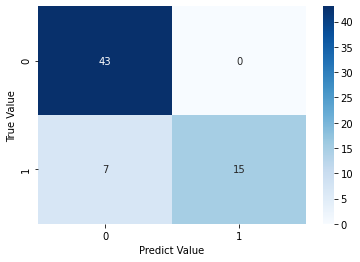

In [3]:
df =pd.read_csv('XGBC_weight.csv')
X = df.iloc[:,1:11]
y = df.iloc[:,16]
X_train,X_test,y_train,y_test = TTS (
    X,y,test_size = 0.15,random_state = 9,stratify = y)

XGBW = XGBClassifier(colsample_bytree=0.3, gamma=0.6, learning_rate=0.02, max_depth=8, 
                  min_child_weight=1, n_estimators=14, subsample=0.9)
XGBW.fit(X_train, y_train)


y_pred = XGBW.predict(X)
con=confusion_matrix(y,y_pred)
con = pd.DataFrame(con)
print(con)
#xticks = ['Insensitive to ${NO_2}$','Sensitive to ${NO_2}$']
#yticks = ['Insensitive to ${NO_2}$','Sensitive to ${NO_2}$']
shp = sn.heatmap(con,annot=True,cmap='Blues')
                 #,xticklabels=xticks,yticklabels=yticks)
shp.set_ylabel('True Value')
shp.set_xlabel('Predict Value')
#shp.set(rc={'figure.figsize':(11.7,8.27)})